# Загрузка, предобработка данных 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [2]:
houses = fetch_california_housing()
df = pd.DataFrame(data = np.c_[houses['data'], houses['target']],
                     columns= houses['feature_names'] + ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Для начала удалим выбросы, как в прошлый раз (потому что дерьевья все-таки чувствительны к выбросам), а после нормализуем один из признаков.

In [4]:
df_copy = df.copy()
df.head()
df_copy = df_copy.drop('AveBedrms', axis = 1)

In [5]:
df_copy = df_copy.loc[(df_copy['AveRooms']<8.4)]
df_copy = df_copy.loc[(df_copy['AveOccup']<4.6)]
df_copy = df_copy.loc[(df_copy['Population']<3120)]

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      18389 non-null  float64
 1   HouseAge    18389 non-null  float64
 2   AveRooms    18389 non-null  float64
 3   Population  18389 non-null  float64
 4   AveOccup    18389 non-null  float64
 5   Latitude    18389 non-null  float64
 6   Longitude   18389 non-null  float64
 7   target      18389 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
for i in df_copy.columns:
    print(f'{i}: min: {min(df_copy[i])}, max: {max(df_copy[i])}.')

MedInc: min: 0.4999, max: 15.0001.
HouseAge: min: 1.0, max: 52.0.
AveRooms: min: 0.8461538461538461, max: 8.394871794871795.
Population: min: 3.0, max: 3118.0.
AveOccup: min: 0.75, max: 4.599455040871935.
Latitude: min: 32.54, max: 41.95.
Longitude: min: -124.35, max: -114.55.
target: min: 0.14999, max: 5.00001.


Нормализуем Population, так как там разброс значений сильнее. 

In [8]:
i_min = min(df_copy['Population'])
i_max = max(df_copy['Population'])
df_copy['Population'] = df_copy['Population'].apply(lambda x: (x-i_min)/(i_max-i_min))

In [9]:
df_copy["Population"]

0        0.102408
1        0.769823
2        0.158266
3        0.178170
4        0.180417
           ...   
20635    0.270305
20636    0.113323
20637    0.322311
20638    0.236918
20639    0.444302
Name: Population, Length: 18389, dtype: float64

Разделим выборку на обучающее и тестовое подмножества. 

In [10]:
X = df_copy.drop('target', axis = 1)
y = df_copy['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия

In [12]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

In [13]:

print(f'На трейне: {model_lr.score(X_train, y_train)}')
print(f'На тесте: {model_lr.score(X_test, y_test)}')

На трейне: 0.6662814077012353
На тесте: 0.6462109507851745


# Обучение дерева решений

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
def DTR(depth = None, leaf = 1, split = 2, features = None):
    DTR_model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf = leaf, min_samples_split = split, max_features = features)
    DTR_model.fit(X_train, y_train)
    return f'На трейне: {DTR_model.score(X_train, y_train)}\nНа тесте: {DTR_model.score(X_test, y_test)}\n'

In [16]:
for i in range(1,10):
    print(f'{i}: {DTR(depth = i)}')

1: На трейне: 0.2942981500364241
На тесте: 0.2839306178534142

2: На трейне: 0.42995483876378493
На тесте: 0.43098750283762843

3: На трейне: 0.5278636985791445
На тесте: 0.5038552659531501

4: На трейне: 0.5816859878505924
На тесте: 0.5510625479558744

5: На трейне: 0.6343443060499518
На тесте: 0.6039122765090033

6: На трейне: 0.6815773155829173
На тесте: 0.637371172806247

7: На трейне: 0.7304123459905743
На тесте: 0.6716947973307434

8: На трейне: 0.7761884423627401
На тесте: 0.692053408768033

9: На трейне: 0.8126277237411421
На тесте: 0.7026652490311451



C 8 началось переобучение. Останемся на 7. 

Оптимизируем min_samples_leaf.

In [17]:
for i in range(1,5):
    print(f'{i}: {DTR(depth = 7, leaf = i)}')

1: На трейне: 0.7304123459905743
На тесте: 0.6716947973307434

2: На трейне: 0.7298114740295847
На тесте: 0.6686919620428189

3: На трейне: 0.7292377367339431
На тесте: 0.6721052421796778

4: На трейне: 0.7290252626122007
На тесте: 0.6726388389273019



От изменения значения параметра min_samples_leaf ничего толком не меняется. Попробуем другие. 

In [18]:
for i in range(2,8):
    print(f'{i}: {DTR(depth = 7, split = i)}')

2: На трейне: 0.7304123459905743
На тесте: 0.6672819851480205

3: На трейне: 0.7300177109551662
На тесте: 0.6715694277866978

4: На трейне: 0.7300177109551662
На тесте: 0.6727035646608861

5: На трейне: 0.73001534541421
На тесте: 0.6715694277866977

6: На трейне: 0.7298976902362804
На тесте: 0.6715694277866977

7: На трейне: 0.7298855102804029
На тесте: 0.6727035646608861



In [19]:
len(X.columns)

7

In [20]:
for i in range(1,8):
    print(f'{i}: {DTR(depth = 7, features = i)}')

1: На трейне: 0.49635608068228587
На тесте: 0.452526618014521

2: На трейне: 0.5884061809063047
На тесте: 0.5392687842423505

3: На трейне: 0.6728913409113887
На тесте: 0.6238705723177913

4: На трейне: 0.7062770317201534
На тесте: 0.6429866633304

5: На трейне: 0.6954142276890145
На тесте: 0.6292379682163973

6: На трейне: 0.7209207258343122
На тесте: 0.6671858126659914

7: На трейне: 0.7304123459905743
На тесте: 0.6723274720752805



Делаем вывод, что на данном датасете изменение других параметров помимо глубины дерева особо не влияет на качество обучения модели.

По сравнению с логистической регрессией, модель лучше обучилась на решающем дереве с тем условием, что была оптимизирована глубина дерева.

Визуализируем часть дерева решений (до трех, дальше получается нечитабельная каша).

In [21]:
from sklearn import tree
%matplotlib inline

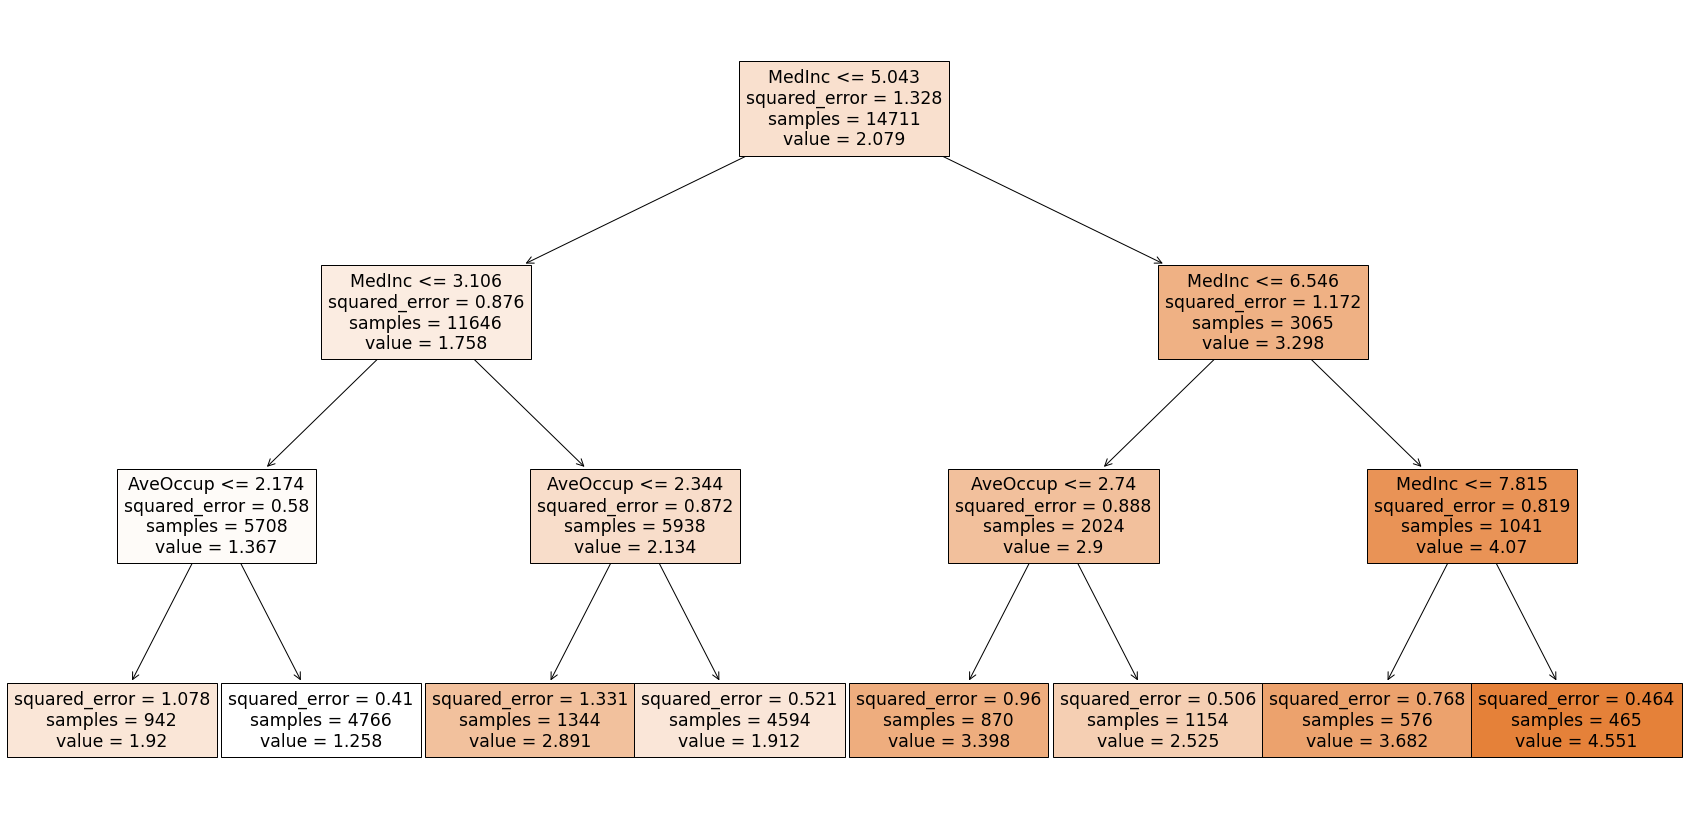

In [22]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
fig = plt.figure(figsize = (30, 15))
tree.plot_tree(model, feature_names=df_copy.columns, filled=True)
plt.show()

Вывод: использование дерева решений лучше использовать в случае, если разработчик не знает предметную область и не имеет возможности пообщаться со специалистами предметной области. Однозначный плюс деревьев решений состоит в том, что не нужно проделывать долгой работы с предобработкой признаков, следовательно, сильно экономит время. Риски при применении деревьев решений тоже есть: высокая вероятность переобучения модели, также они чувствительны к выбросам во входных данных. 